# 1. Import all needed libraries

In [11]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt 
import os
import numpy as np
from scipy.stats.stats import spearmanr
from scipy.stats.stats import pearsonr

# 2. Change the working directory

In [12]:
os.chdir('/Users/neda/Dropbox (PopGen)/tmp/egg_size_method_paper/scripts/')
os.getcwd()

'/Users/neda/Dropbox (PopGen)/tmp/egg_size_method_paper/scripts'

# 3. Functions

In [13]:
#this function removes the extra columns and converts time to integer
def clean_data(dataset):
    dataset.drop(['Id', 'Plate', 'Row', 'Column', 'Source well', 'Clog','BFP', 'GFP',
           'dsRED', 'PH Extinction', 'PW Extinction', 'PC Extinction', 'PH BFP',
           'PW BFP', 'PC BFP', 'PH GFP', 'PW GFP', 'PC GFP', 'PH dsRED',
           'PW dsRED', 'PC dsRED', 'Unnamed: 26'], inplace=True, axis=1)    
    dataset = dataset.dropna()
    dataset['Time'] = dataset['Time'].apply(pd.to_numeric)    
    return dataset

#this function computes percentage sort recovery which is the percentage of objects that were sorted and dispensed
#as a fraction of all the objects fulfilling sorting criteria, i.e. size
def compute_sort_recovery(data):
    #make a dataset of sorted objects
    data_srt = data.loc[data['Sorted status'] == 6]
    #determine the region of sorted objects
    region = list(set(data_srt['In Regions']))
    #compute the number of objects in this region
    num_egg_gate = len(data[data['In Regions'].isin(region)])
    #compute the number of sorted objects
    num_egg_sort = len(data_srt)
    #compute sort recovery percentage
    data_srtrec = num_egg_sort/num_egg_gate*100  
    #compute sorting time, the time is in millisecond so it will be converted to minute
    srt_time= (max(data['Time'])-min(data['Time']))/60000
    srt_speed = num_egg_sort/srt_time
    measure_speed = num_egg_gate/srt_time
    return(num_egg_sort, num_egg_gate, data_srtrec, srt_time, srt_speed, measure_speed)

#this function sets the color of fliers for boxplots
def set_color_flier(col):
    flierprops = dict( marker = '.',color = col, markerfacecolor = col, markeredgecolor = col, markersize =3)   
    return flierprops

#this function sets the color of boxes and whiskers for boxplots
def set_color_box(col):    
    colors=[ col] * 100
    fullset_color_box = colors
    fullset_color_whisker = [ col] * 80
    for patch, col in zip(box['boxes'], fullset_color_box):
        patch.set_facecolor(col)
        patch.set_edgecolor(col)
    for patch, col in zip(box['whiskers'], fullset_color_whisker):
        patch.set_color(col)
        patch.set_linestyle('-')


# 4. Computation of sort recovery

## 4.1 Input file

### The biosorter summary files from a total of 28 datasets are used. 


In [14]:
#Nov 25 data
C1_nov25 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_25-11-2022/C1_allgates_sc65.txt')
C2_nov25 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_25-11-2022/C2_allgates_sc65.txt')
C3_nov25 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_25-11-2022/C3_allgates_sc65.txt')

L1_nov25_1 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_25-11-2022/L1_R12.3R12.4_1_sc65.txt')
L1_nov25_2 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_25-11-2022/L1_R12.3R12.4_2_sc65.txt')
L1_nov25_3 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_25-11-2022/L1_R13.1R13.2R13.3R13.4_sc65.txt')
L2_nov25_1 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_25-11-2022/L2_R12.3R12.4_sc65.txt')
L2_nov25_2 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_25-11-2022/L2_R12.4_R13.1R13.2R13.3R13.4sc65.txt')
L3_nov25_1 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_25-11-2022/L3_R12._r13.1r13.2r13.3r13.44sc65.txt')
L3_nov25_2 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_25-11-2022/L3_R12.3_R12.4sc65.txt')

#Nov 7 data
C1_Nov7 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_07-11-2022/C1_allgates.txt')
C2_Nov7 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_07-11-2022/C2_allgates.txt')
C3_Nov7 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_07-11-2022/C3_allgates.txt')

L1_Nov7 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_07-11-2022/L1_R12.3.4_R13.1.2.3.4.txt')
L2_Nov7 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_07-11-2022/L2_R12.1.2.3.4_R13.1.2.3.4.txt')
L2_Nov7_2 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_07-11-2022/L2_R12.3.4_R13.1.2.3.4.txt')

#Sep 15 data
C1_Sep15 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_15-09-2022/C1_R30.txt')
C2_Sep15 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_15-09-2022/C2_R30.txt')
C3_Sep15 = pd.read_table('../data/Drosophila eggs_OD1_5_1xPBS_15-09-2022/C3_R30.txt')

#July 25 data
C1_July25 = pd.read_table('../data/Drosophila_eggs_OD1_5_1xPBS_25-07-2022/C1_R19.txt')
C2_July25 = pd.read_table('../data/Drosophila_eggs_OD1_5_1xPBS_25-07-2022/C2_R19.txt')
C3_July25 = pd.read_table('../data/Drosophila_eggs_OD1_5_1xPBS_25-07-2022/C3_R19.txt')

L1_July25_1 = pd.read_table('../data/Drosophila_eggs_OD1_5_1xPBS_25-07-2022/L1_R12.txt')
L1_July25_2 = pd.read_table('../data/Drosophila_eggs_OD1_5_1xPBS_25-07-2022/L1_R13.txt')
L2_July25_1 = pd.read_table('../data/Drosophila_eggs_OD1_5_1xPBS_25-07-2022/L2_R12.txt')
L2_July25_2 = pd.read_table('../data/Drosophila_eggs_OD1_5_1xPBS_25-07-2022/L2_R13.txt')
L3_July25_1 = pd.read_table('../data/Drosophila_eggs_OD1_5_1xPBS_25-07-2022/L3_R12.txt')
L3_July25_2 = pd.read_table('../data/Drosophila_eggs_OD1_5_1xPBS_25-07-2022/L3_R13.txt')


### We remove the extra columns in each dataset

In [15]:
#Nov 25 dataset
C1_nov25 = clean_data(C1_nov25)
C2_nov25 = clean_data(C2_nov25)
C3_nov25 = clean_data(C3_nov25)

L1_nov25_1 = clean_data(L1_nov25_1)
L1_nov25_2 = clean_data(L1_nov25_2)
L1_nov25_3 = clean_data(L1_nov25_3)
L2_nov25_1=clean_data(L2_nov25_1)
L2_nov25_2=clean_data(L2_nov25_2)
L3_nov25_1=clean_data(L3_nov25_1)
L3_nov25_2=clean_data(L3_nov25_2)

#Nov 7 dataset
C1_Nov7 = clean_data(C1_Nov7)
C2_Nov7 = clean_data(C2_Nov7)
C3_Nov7 = clean_data(C3_Nov7)

L1_Nov7 = clean_data(L1_Nov7)
L2_Nov7 = clean_data(L2_Nov7)
L2_Nov7_2 = clean_data(L2_Nov7_2)

#Sep 15 dataset
C1_Sep15 = clean_data(C1_Sep15)
C2_Sep15 = clean_data(C2_Sep15)
C3_Sep15 = clean_data(C3_Sep15)

#July 25 dataset
C1_July25 = clean_data(C1_July25)
C2_July25 = clean_data(C2_July25)
C3_July25 = clean_data(C3_July25)

L1_July25_1 = clean_data(L1_July25_1)
L1_July25_2 = clean_data(L1_July25_2)
L2_July25_1 = clean_data(L2_July25_1)
L2_July25_2 = clean_data(L2_July25_2)
L3_July25_1 = clean_data(L3_July25_1)
L3_July25_2 = clean_data(L3_July25_2)

<ipython-input-13-5e5e57c10edb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Time'] = dataset['Time'].apply(pd.to_numeric)
<ipython-input-13-5e5e57c10edb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Time'] = dataset['Time'].apply(pd.to_numeric)
<ipython-input-13-5e5e57c10edb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

<ipython-input-13-5e5e57c10edb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Time'] = dataset['Time'].apply(pd.to_numeric)
<ipython-input-13-5e5e57c10edb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Time'] = dataset['Time'].apply(pd.to_numeric)
<ipython-input-13-5e5e57c10edb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

## 4.2 Computation of sort recovery percentage

### The output data for each dataset contains the number of sorted eggs, total number of eggs, sort recovery, time required to sort, number of sorted eggs per minute and number of measured eggs per minute.


In [16]:
all_data_srt = [compute_sort_recovery(i) for i in
    [C1_nov25, C2_nov25, C3_nov25,L1_nov25_1, L1_nov25_2, L1_nov25_2, L2_nov25_1,L2_nov25_2, L3_nov25_1,L3_nov25_2,
    C1_Nov7, C2_Nov7,C3_Nov7, L1_Nov7, L2_Nov7, L2_Nov7_2,
    C1_Sep15, C2_Sep15, C3_Sep15,
    C1_July25, C2_July25, C3_July25, 
    L1_July25_1, L1_July25_2, L2_July25_1, L2_July25_2, L3_July25_1, L3_July25_2]]

## 4.3 Data visualization

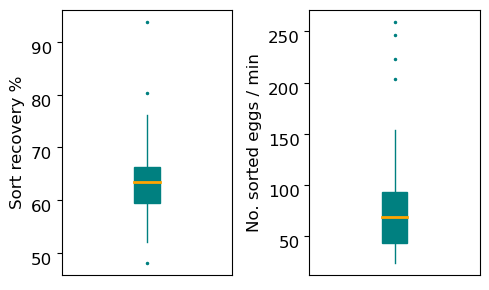

In [17]:
fig , ax = plt.subplots(nrows = 1, ncols = 2, sharex=True, sharey=True,figsize=(5,3),dpi=100, facecolor='w', edgecolor='k')    
#plot the sort recovery
ax=plt.subplot(1,2,1)
set_color_flier('teal')
box=ax.boxplot([i[2] for i in all_data_srt], medianprops = dict(color="orange",linewidth=2), vert = True,showcaps = False, showfliers = True, patch_artist=True, flierprops=set_color_flier('teal'))
set_color_box('teal')
plt.ylabel('Sort recovery %',fontsize=12)
plt.xticks([0],[''], va='top')
plt.yticks(fontsize=12, va='top')

#plot the number of sorted eggs per minutes
ax=plt.subplot(1,2,2)
set_color_flier('teal')
box=ax.boxplot([i[4] for i in all_data_srt], medianprops = dict(color="orange",linewidth=2), vert = True,showcaps = False, showfliers = True, patch_artist=True, flierprops=set_color_flier('teal'))
set_color_box('teal')
plt.ylabel('No. sorted eggs / min',fontsize=12)
plt.yticks(fontsize=12, va='top')
plt.xticks([0],[''], va='top')

fig.tight_layout()
plt.savefig('../plots/final_plots/sort_speed_revision.jpeg', dpi=100,format='jpeg', bbox_inches = 'tight')
plt.savefig('../plots/final_plots/sort_speed_revision.svg', dpi=100,format='svg', bbox_inches = 'tight')


## 4.2 Summary statistics for sort recovery

In [19]:
#get summary stat of sort recovery
print(np.mean([i[2] for i in all_data_srt]))   #64.41635876038505
print(np.median([i[2] for i in all_data_srt])) #63.537351560342444

#get summary stat of No. sorted eggs / min
print(np.mean([i[4] for i in all_data_srt]))   #89.75926058644359
print(np.median([i[4] for i in all_data_srt])) #68.95914669984325

64.41635876038505
63.537351560342444
89.75926058644359
68.95914669984325
